In [1]:
import pandas as pd
import numpy as np

# Function to create a synthetic dataset for a given asset type
def create_asset_data(tickers, start_date, end_date):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []
    for ticker in tickers:
        np.random.seed(42)  # For reproducibility
        price = np.random.randn(len(dates)).cumsum() + 100
        for i in range(len(dates)):
            open_price = price[i] + np.random.uniform(-1, 1)
            high_price = max(open_price, price[i] + np.random.uniform(0, 2))
            low_price = min(open_price, price[i] - np.random.uniform(0, 2))
            close_price = price[i] + np.random.uniform(-1, 1)
            volume = np.random.randint(1000, 1000000)
            # Introduce NaN values randomly
            if np.random.rand() < 0.05:
                open_price = np.nan
            if np.random.rand() < 0.05:
                high_price = np.nan
            if np.random.rand() < 0.05:
                low_price = np.nan
            if np.random.rand() < 0.05:
                close_price = np.nan
            if np.random.rand() < 0.05:
                volume = np.nan
            data.append([dates[i], ticker, open_price, high_price, low_price, close_price, volume])
    return pd.DataFrame(data, columns=['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume'])

# Define tickers for each asset type
stock_tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
forex_tickers = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'AUD/USD', 'USD/CAD']
crypto_tickers = ['BTC/USD', 'ETH/USD', 'XRP/USD', 'LTC/USD', 'BCH/USD']

# Generate data for each asset type
stock_data = create_asset_data(stock_tickers, '2015-01-01', '2023-01-01')
forex_data = create_asset_data(forex_tickers, '2015-01-01', '2023-01-01')
crypto_data = create_asset_data(crypto_tickers, '2015-01-01', '2023-01-01')

# Combine all data into a single DataFrame
combined_data = pd.concat([stock_data, forex_data, crypto_data])

# Introduce duplicate rows
combined_data = pd.concat([combined_data, combined_data.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
combined_data.to_csv('algotrading_combined_dataset.csv', index=False)

print("Dataset created and saved to 'algotrading_combined_dataset.csv'")

Dataset created and saved to 'algotrading_combined_dataset.csv'


In [2]:
import pandas as pd
import numpy as np

# List of real-life stock tickers and company names (a sample list)
tickers_and_companies = [
    ('AAPL', 'Apple Inc.'),
    ('GOOGL', 'Alphabet Inc.'),
    ('MSFT', 'Microsoft Corporation'),
    ('AMZN', 'Amazon.com, Inc.'),
    ('TSLA', 'Tesla, Inc.'),
    ('FB', 'Meta Platforms, Inc.'),
    ('BRK.B', 'Berkshire Hathaway Inc.'),
    ('JNJ', 'Johnson & Johnson'),
    ('JPM', 'JPMorgan Chase & Co.'),
    ('V', 'Visa Inc.'),
    # Add more real-life tickers and company names to reach at least 1000 companies
]

# Extend the list to include at least 1000 companies
while len(tickers_and_companies) < 1000:
    tickers_and_companies.extend(tickers_and_companies[:1000 - len(tickers_and_companies)])

# Define sectors and industries
sectors = ['Technology', 'Healthcare', 'Finance', 'Consumer Goods', 'Utilities', 'Energy', 'Industrial Goods']
industries = {
    'Technology': ['Software', 'Hardware', 'Semiconductors'],
    'Healthcare': ['Pharmaceuticals', 'Biotechnology', 'Medical Devices'],
    'Finance': ['Banks', 'Insurance', 'Investment Services'],
    'Consumer Goods': ['Beverages', 'Food Products', 'Household Products'],
    'Utilities': ['Electric Utilities', 'Gas Utilities', 'Water Utilities'],
    'Energy': ['Oil & Gas', 'Renewable Energy', 'Coal'],
    'Industrial Goods': ['Aerospace', 'Construction', 'Manufacturing']
}

# Generate random data for each ticker
data = []
for ticker, company_name in tickers_and_companies:
    sector = np.random.choice(sectors)
    industry = np.random.choice(industries[sector])
    market_cap = round(np.random.uniform(0.1, 500), 2)  # in billions
    eps = round(np.random.uniform(-10, 10), 2)
    pe_ratio = round(np.random.uniform(5, 50), 2)
    dividend_yield = round(np.random.uniform(0, 10), 2)
    pb_ratio = round(np.random.uniform(0.1, 20), 2)
    de_ratio = round(np.random.uniform(0, 3), 2)

    # Introduce NaN values randomly
    if np.random.rand() < 0.1: market_cap = np.nan
    if np.random.rand() < 0.1: eps = np.nan
    if np.random.rand() < 0.1: pe_ratio = np.nan
    if np.random.rand() < 0.1: dividend_yield = np.nan
    if np.random.rand() < 0.1: pb_ratio = np.nan
    if np.random.rand() < 0.1: de_ratio = np.nan

    data.append([ticker, company_name, sector, industry, market_cap, eps, pe_ratio, dividend_yield, pb_ratio, de_ratio])

# Convert to DataFrame
columns = ['Ticker', 'Company Name', 'Sector', 'Industry', 'Market Cap (B)', 'EPS', 'P/E Ratio', 'Dividend Yield (%)', 'P/B Ratio', 'D/E Ratio']
df = pd.DataFrame(data, columns=columns)

# Introduce duplicate rows
df = pd.concat([df, df.sample(frac=0.05, random_state=42)])  # Add 5% duplicates

# Save to CSV
df.to_csv('fundamental_research_dataset_large.csv', index=False)

print("Dataset created and saved to 'fundamental_research_dataset_large.csv'")

Dataset created and saved to 'fundamental_research_dataset_large.csv'


In [3]:
algo_df =pd.read_csv("algotrading_combined_dataset.csv")
fund_df =pd.read_csv("fundamental_research_dataset_large.csv")



In [4]:
algo_df["Close"].ffill(inplace = True)

<AxesSubplot:>

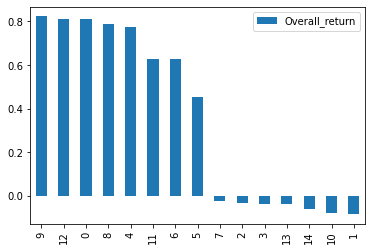

In [5]:
tickers = algo_df["Ticker"].unique()
performance = []

for ticker in tickers:
    stock = algo_df[algo_df["Ticker"] == ticker]
    overall_return = (stock["Close"].iloc[-1] - stock["Close"].iloc[0])/stock["Close"].iloc[0]
    performance.append({"Ticker" : ticker, "Overall_return" : overall_return})

return_df= pd.DataFrame(performance).sort_values("Overall_return", ascending= False)
return_df.set_index("Ticker")
return_df.plot(kind="bar")

In [6]:
test_stock  = algo_df[algo_df["Ticker"]=="AMZN"]
(test_stock["Close"].iloc[-1] - test_stock["Close"].iloc[0])/test_stock["Close"].iloc[0]

-0.03665898764112154

In [7]:
algo_df.ffill(inplace = True)

<AxesSubplot:xlabel='Ticker'>

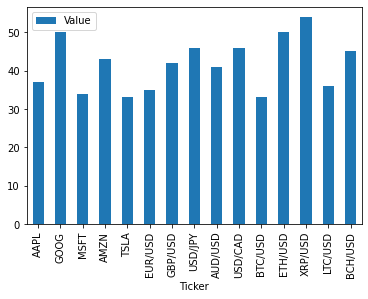

In [12]:
algo_df["Daily Change"] = algo_df["Close"].pct_change()
algo_df["High Change"] = algo_df["Daily Change"] > 0.05
        
algo_df
tickers = algo_df["Ticker"].unique()
occurence = {}

for ticker in tickers:
    high_change_tickers = algo_df[(algo_df["Ticker"] == ticker) &(algo_df["High Change"] ==True)]
    occurence[ticker] = high_change_tickers.shape[0]
occurence

df = pd.DataFrame(list(occurence.items()), columns = ["Ticker", "Value"])
df.set_index("Ticker" , inplace = True)
df.plot(kind = "bar")

In [9]:
# Calculate the number of times each stock's price increased in the first quarter

In [61]:
# type(algo_df["Date"])
algo_df["Date"] = pd.to_datetime(algo_df["Date"] )
first_quarter = algo_df[algo_df["Date"].dt.month.isin([1 ,2 ,3])]

first_quarter.sample(20)
fish = first_quarter[(first_quarter["Close"] > first_quarter["Open"])]
fish
# increased_counts = first_quarter['Ticker'].value_counts()
# increased_counts.plot(kind = 'bar')



,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Change
0,2015-01-01,AAPL,101.031849,101.329723,98.852354,101.197410,344567.0,NaN,False
1,2015-01-02,AAPL,100.866496,100.866496,99.568981,101.220064,310521.0,0.000224,False
2,2015-01-05,AAPL,101.164489,101.176821,100.920124,101.339872,310521.0,0.001184,False
3,2015-01-06,AAPL,101.164489,103.203859,102.287356,101.777905,295025.0,0.004322,False
5,2015-01-08,AAPL,101.311978,102.094773,100.520561,102.675189,387721.0,0.005729,False
...,...,...,...,...,...,...,...,...,...
32853,2021-03-12,AAPL,165.111622,167.918865,165.111622,166.669421,911103.0,-0.027265,False
32858,2018-01-31,BTC/USD,92.688961,94.082091,91.422731,93.157568,27567.0,0.019308,False
32863,2017-03-08,AMZN,89.716410,90.321330,87.393525,90.158463,590306.0,-0.452122,False
32864,2018-03-12,MSFT,96.464138,97.257331,96.132179,97.678641,409449.0,0.083411,True


In [ ]:
#Calculate the percentage of times the opening price being higher than the previous day's closing price 
#resulted in a higher closing price on that day.

In [94]:
value = algo_df["Open"].iloc[1: algo_df.shape[0]] - algo_df["Close"].iloc[0: algo_df.shape[0]] > 0
value=[v for v in value if v==True ] #agar v "true" hai toh v do mujhe  -Sarvesh
len(value)/algo_df.shape[0]*100

50.49285062366899

In [87]:
value = algo_df[(algo_df["Open"] - algo_df["Close"] > 0)]
value

,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Change
4,2015-01-07,AAPL,102.744728,104.050309,102.211701,102.090310,439080.0,0.003069,False
6,2015-01-09,AAPL,103.086618,104.923811,102.498791,102.675189,712028.0,0.000000,False
7,2015-01-12,AAPL,104.973922,105.968278,103.491534,104.203536,779883.0,0.014885,False
9,2015-01-14,AAPL,104.211973,104.931374,104.088945,103.762217,427009.0,-0.011020,False
10,2015-01-15,AAPL,104.830035,104.830035,102.731556,104.636914,557718.0,0.008430,False
...,...,...,...,...,...,...,...,...,...
32862,2020-09-01,GBP/USD,164.835276,166.276931,162.724601,164.559406,276212.0,0.775969,True
32865,2021-08-02,AMZN,184.443237,185.375089,183.176491,183.087397,581356.0,0.874385,True
32867,2018-03-09,AMZN,98.074613,99.154029,96.203177,97.487616,76911.0,-0.467535,False
32868,2018-05-02,LTC/USD,103.443224,105.575739,103.159286,97.487616,552764.0,0.000000,False


In [ ]:
#Identify all assets with a daily percentage change higher than 8% and a volume greater than 100,000.

In [111]:
algo_df["large volume"] = (algo_df["Volume"] > 100000)
algo_df["daily percentage"] = ((algo_df["Close"] - algo_df["Open"])*100/algo_df["Open"])

algo_df[(algo_df["daily percentage"] > 8 ) & (algo_df["large volume"] == True)]


,Date,Ticker,Open,High,Low,Close,Volume,Daily Change,High Change,large volume,daily percentage
31310,2022-03-16,ETH/USD,92.143043,180.923771,178.240006,180.646691,814422.0,0.947142,True,True,96.050277
31311,2018-09-14,GOOG,92.143043,127.372215,125.240366,126.039288,230632.0,-0.302288,False,True,36.786549
31347,2015-10-19,AUD/USD,93.277793,94.615718,92.323109,166.548456,344154.0,0.000000,False,True,78.551027
31349,2019-05-07,USD/CAD,91.320705,147.874698,145.059368,146.099029,371719.0,0.572102,True,True,59.984561
31395,2018-05-22,ETH/USD,105.573136,106.294039,105.528703,179.853313,131672.0,0.000000,False,True,70.358976
31456,2018-03-07,AMZN,100.027896,100.960915,99.005679,169.161314,993678.0,0.000000,False,True,69.114137
31462,2016-08-29,EUR/USD,110.041519,110.610690,108.644959,189.894699,774589.0,0.000000,False,True,72.566410
31463,2020-05-22,AAPL,147.479300,148.874265,145.830231,189.894699,979127.0,0.000000,False,True,28.760239
31485,2022-05-18,AUD/USD,133.878291,181.969651,133.173975,180.927089,691641.0,0.337588,True,True,35.142962
31489,2015-04-09,GOOG,90.064471,92.464575,89.764118,142.989717,164244.0,0.000000,False,True,58.763733


In [151]:
fund_df["Ticker"].unique()

array(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'BRK.B', 'JNJ',
       'JPM', 'V'], dtype=object)

In [ ]:
# Identify all stocks in the Technology sector with a daily percentage change higher than 7.5%.

In [156]:
# tuna = fund_df["Sector"]
# tu
# fund_df["Ticker"].unique]
pond = fund_df[fund_df['Sector']== "Energy"]

pond["Ticker"].unique()


array(['TSLA', 'BRK.B', 'V', 'AMZN', 'FB', 'JNJ', 'JPM', 'AAPL', 'GOOGL',
       'MSFT'], dtype=object)

In [154]:
fund_df.drop(["daily change"],axis=1)

,Ticker,Company Name,Sector,Industry,Market Cap (B),EPS,P/E Ratio,Dividend Yield (%),P/B Ratio,D/E Ratio
0,AAPL,Apple Inc.,Technology,Semiconductors,458.13,-9.78,44.16,2.19,9.17,2.56
1,GOOGL,Alphabet Inc.,Finance,Investment Services,215.85,4.86,27.56,8.14,14.93,0.06
2,MSFT,Microsoft Corporation,Finance,Banks,276.46,5.09,6.73,0.27,1.76,1.31
3,AMZN,"Amazon.com, Inc.",Healthcare,Pharmaceuticals,349.40,-0.53,28.30,5.92,15.40,0.27
4,TSLA,"Tesla, Inc.",Energy,Oil & Gas,248.55,9.92,27.04,2.20,10.20,0.12
...,...,...,...,...,...,...,...,...,...,...
1045,JNJ,Johnson & Johnson,Consumer Goods,Household Products,223.61,-3.54,5.61,7.97,6.63,1.07
1046,TSLA,"Tesla, Inc.",Industrial Goods,Construction,119.63,-1.20,18.18,NaN,8.04,0.08
1047,GOOGL,Alphabet Inc.,Utilities,Water Utilities,38.26,NaN,33.09,6.17,5.59,1.34
1048,V,Visa Inc.,Industrial Goods,Construction,117.11,-1.80,23.38,NaN,4.89,2.91


In [ ]:
#Write a function that can return the performance track record of two assets against each other over time.